$$\textrm{Joaquin Peñuela Parra}$$
$$\textrm{Universidad de los Andes}$$
$$\textrm{Grupo de Física de Altas Energías: Fenomenología de Partículas}$$

$\textbf{Preliminares}$ 

Las librerías que se usan aquí son las siguientes: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

plt.rcParams["font.family"] = "serif"

In [2]:
format_figures = 'pdf'
#!rm **.{format_figures}

Leamos los archivos.txt con las significancias para poder graficarlas:

In [3]:
channels = ['hadronic', 'semileptonic', 'combined']
signals = ['sLQ', 'dLQ']

In [4]:
Datas = {}
for signal in signals:
    for channel in channels:
        Datas[f'SIGNICANSES_{signal}_{channel}'] = pd.DataFrame(np.loadtxt(f'significances_txt/SIGNICANSES_{signal}_{channel}.txt', delimiter= ' = '))

In [5]:
curvas_de_nivel = { r'1.69 $\sigma$': 1.69, r'3 $\sigma$': 3, r'5 $\sigma$': 5}
colors = ['mediumblue', 'limegreen', 'orange', 'gold'] #https://matplotlib.org/stable/gallery/color/named_colors.html

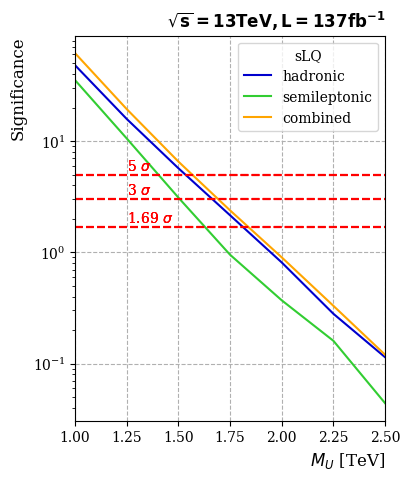

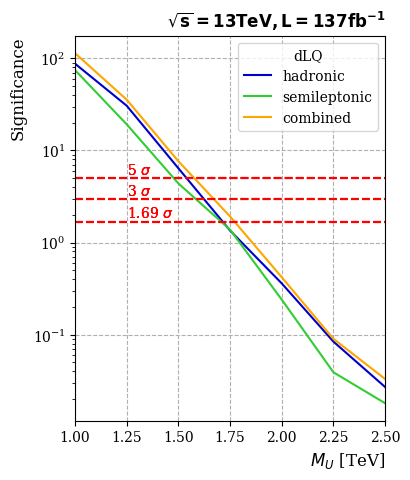

In [6]:
for signal in signals:
    fig = plt.figure(figsize = (4,5))
    for i in range(len(channels)):
        channel = channels[i]
        
        plt.plot((Datas[f'SIGNICANSES_{signal}_{channel}'][0])/1000,Datas[f'SIGNICANSES_{signal}_{channel}'][1], label = channel, color = colors[i])
        
        for curva in curvas_de_nivel:
            plt.axhline(curvas_de_nivel[curva], color = 'red', ls = '--', ) #Asintota para cada curva con x fijo
            plt.text(1250/1000, curvas_de_nivel[curva]*1.1, curva, color = 'red')
                    
    plt.xlim(np.min(Datas[f'SIGNICANSES_{signal}_{channel}'][0])/1000, np.max(Datas[f'SIGNICANSES_{signal}_{channel}'][0])/1000)
    plt.xlabel(r'$M_{U}$ [TeV]', loc= 'right', fontsize = 12)
    plt.ylabel('Significance', loc = 'top', fontsize = 12)
    plt.yscale('log')
    plt.grid(True, linestyle = '--')
    plt.legend(title = signal)    
    plt.title(r'$\mathbf{\sqrt{s} = 13 TeV, L = 137 fb^{-1}}$', loc = 'right')
    plt.savefig(f'Significances_{signal}.{format_figures}', dpi=300, bbox_inches='tight')

In [7]:
signals = ['sLQ', 'dLQ', 'all']
Datas['SIGNICANSES_all_combined'] = pd.DataFrame(np.loadtxt(f'significances_txt/SIGNICANSES_all_combined.txt', delimiter= ' = '))

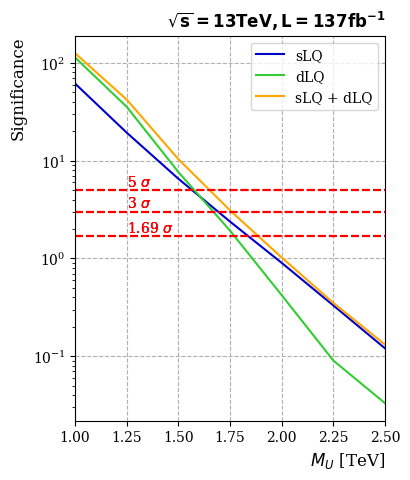

In [8]:
fig = plt.figure(figsize = (4,5))

for i in range(len(signals)):
    signal = signals[i]
    channel = 'combined'
    
    if signal == 'all': etiqueta = 'sLQ + dLQ'
    else: etiqueta = signal
    
    plt.plot(Datas[f'SIGNICANSES_{signal}_{channel}'][0]/1000,Datas[f'SIGNICANSES_{signal}_{channel}'][1], label = etiqueta, color = colors[i])


    for curva in curvas_de_nivel:
        plt.axhline(curvas_de_nivel[curva], color = 'red', ls = '--', ) #Asintota para cada curva con x fijo
        plt.text(1250/1000, curvas_de_nivel[curva]*1.1, curva, color = 'red')

plt.xlim(np.min(Datas[f'SIGNICANSES_{signal}_{channel}'][0])/1000, np.max(Datas[f'SIGNICANSES_{signal}_{channel}'][0])/1000)
plt.xlabel(r'$M_{U}$ [TeV]', loc= 'right', fontsize = 12)
plt.ylabel('Significance', loc = 'top', fontsize = 12)
plt.yscale('log')
plt.grid(True, linestyle = '--')
plt.legend()    
plt.title(r'$\mathbf{\sqrt{s} = 13 TeV, L = 137 fb^{-1}}$', loc = 'right')
plt.savefig(f'Significances_{signal}.{format_figures}', dpi=300, bbox_inches='tight')